# ***寿司打の成績予測（株価予測へ）***

---

目的 : scikit learn の勉強

寿司打の次の成績を scikit-learn で予測

決定木を使用

データ数 : 50 (2017.8.21 - 2017.8.23)

まずは、次の成績が前回と比べて上がるか下がるかの予測。（株価の予測を参考）

## ライブラリのインポート

In [2]:
from sklearn import tree, linear_model, svm
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## csvファイルの読み込み

In [3]:
df = pd.read_csv("sushida_data_50.csv")
#df

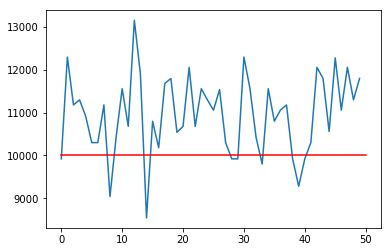

In [4]:
plt.plot(np.arange(len(df.A)), df.A)
plt.plot([0, len(df.A)], [10000, 10000], color="red")

## 学習データ、テストデータ、作成

In [5]:
div = int(len(df.A) * 0.8)
a = df.A[:div].pct_change()
b = df.A[div:].pct_change()
train_X = []
test_X = []
for i in range(1, div):
    train_X.append(a[i] * 100)
for i in range(div+1, len(df.A)):
    test_X.append(b[i] * 100)
print(train_X)
print(test_X)

[23.991935483870975, -9.1056910569105689, 1.0733452593917781, -3.3628318584070782, -5.6776556776556797, 0.0, 8.5436893203883599, -19.141323792486588, 15.265486725663724, 10.940499040307095, -7.6124567474048384, 23.220973782771527, -9.5744680851063801, -28.235294117647058, 26.463700234192046, -5.7407407407407458, 14.734774066797641, 1.0273972602739656, -10.677966101694913, 1.3282732447817747, 12.921348314606739, -11.442786069651746, 8.2397003745318322, -2.249134948096887, -2.12389380530974, 4.3399638336347302, -10.745233968804158, -3.6893203883495151, 0.0, 23.991935483870975, -6.0162601626016272, -9.8615916955017262, -5.9500959692898263, 17.959183673469383, -6.5743944636678204, 2.4074074074074137, 1.0849909584086825, -11.270125223613592, -6.4516129032258114]
[3.8306451612903247, 17.087378640776695, -2.1558872305140975, -10.508474576271187, 16.287878787878785, -9.934853420195445, 9.0415913200723388, -6.3018242122719776, 4.4247787610619538]


In [6]:
train_Y = []
test_Y = []
for i in range(len(train_X)-1):
    if train_X[i] > train_X[i+1]:
        train_Y.append(0)
    else:
        train_Y.append(1)
for i in range(len(test_X)-1):
    if test_X[i] > test_X[i+1]:
        test_Y.append(0)
    else:
        test_Y.append(1)
print(train_Y)
print(test_Y)

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 0, 1]


In [7]:
train_X.pop(0)
test_X.pop(0)
train_X = np.array(train_X)
train_Y = np.array(train_Y)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
print(len(train_X))
print(len(train_Y))
print(len(test_X))
print(len(test_Y))

38
38
8
8


## 1. 決定木で学習

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X.reshape(-1, 1), train_Y)

## テストデータで予測

In [9]:
clf.predict(test_X.reshape(-1, 1))

array([1, 1, 0, 1, 0, 1, 1, 1])

## 作成した分類器の評価

In [10]:
print(clf.score(test_X.reshape(-1, 1), test_Y))

0.75


## ファイル出力

In [11]:
with open('graph.dot', 'w') as f:
        f = tree.export_graphviz(clf, out_file=f)

決定木を可視化してくれるサイト

http://www.webgraphviz.com/

## 2. 確率的勾配降下法で学習

In [12]:
clf = linear_model.SGDClassifier()
clf = clf.fit(train_X.reshape(-1, 1), train_Y)

In [13]:
clf.predict(test_X.reshape(-1, 1))

array([1, 0, 0, 1, 0, 1, 0, 1])

In [14]:
print(clf.score(test_X.reshape(-1, 1), test_Y))

1.0


## 3. サポートベクタマシン

In [15]:
clf = svm.SVC()
clf = clf.fit(train_X.reshape(-1, 1), train_Y)

In [16]:
clf.predict(test_X.reshape(-1, 1))

array([1, 1, 0, 1, 0, 1, 0, 1])

In [17]:
print(clf.score(test_X.reshape(-1, 1), test_Y))

0.875


## 4. ニューラルネットワーク

In [18]:
clf = MLPClassifier(solver="sgd",random_state=0,max_iter=10000)
clf = clf.fit(train_X.reshape(-1, 1), train_Y)

In [19]:
clf.predict(test_X.reshape(-1, 1))

array([1, 0, 0, 1, 0, 1, 0, 1])

In [20]:
print(clf.score(test_X.reshape(-1, 1), test_Y))

1.0


## 5. 単回帰分析

In [21]:
clf = linear_model.LinearRegression()
clf = clf.fit(train_X.reshape(-1, 1), train_Y)
clf.predict(test_X.reshape(-1, 1))

array([ 0.96482987,  0.44292871,  0.21639621,  0.94314645,  0.23195352,
        0.74661817,  0.33048577,  0.62140451])

In [22]:
[a] = clf.coef_
print("回帰係数 : ", end="\t")
print(a)
b = clf.intercept_
print("切片 : ", end="\t\t")
print(b)
print("決定係数 : ", end="\t")
print(clf.score(test_X.reshape(-1, 1), test_Y))

回帰係数 : 	0.0271212366995
切片 : 		0.501399033861
決定係数 : 	0.690978700379


### 式 : Y = aX + b

---
# ***こっちが正しいかも***

In [40]:
def train_func(array):
    train_X = []
    train_Y = []
    for i in range(10, 30):
        s = i - 10
        feature = array[s:i]
        if feature[-1] < array[i]:
            train_Y.append(1)
        else:
            train_Y.append(0)
        train_X.append(feature)
        #print(feature)
    return np.array(train_X), np.array(train_Y)

In [41]:
train_func(np.array(df.A))

(array([[ 9920, 12300, 11180, 11300, 10920, 10300, 10300, 11180,  9040,
         10420],
        [12300, 11180, 11300, 10920, 10300, 10300, 11180,  9040, 10420,
         11560],
        [11180, 11300, 10920, 10300, 10300, 11180,  9040, 10420, 11560,
         10680],
        [11300, 10920, 10300, 10300, 11180,  9040, 10420, 11560, 10680,
         13160],
        [10920, 10300, 10300, 11180,  9040, 10420, 11560, 10680, 13160,
         11900],
        [10300, 10300, 11180,  9040, 10420, 11560, 10680, 13160, 11900,
          8540],
        [10300, 11180,  9040, 10420, 11560, 10680, 13160, 11900,  8540,
         10800],
        [11180,  9040, 10420, 11560, 10680, 13160, 11900,  8540, 10800,
         10180],
        [ 9040, 10420, 11560, 10680, 13160, 11900,  8540, 10800, 10180,
         11680],
        [10420, 11560, 10680, 13160, 11900,  8540, 10800, 10180, 11680,
         11800],
        [11560, 10680, 13160, 11900,  8540, 10800, 10180, 11680, 11800,
         10540],
        [10680, 13160

In [43]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X.reshape(-1, 1), train_Y)

In [44]:
clf.predict(test_X.reshape(-1, 1))

array([1, 1, 0, 1, 0, 1, 1, 1])

In [45]:
print(clf.score(test_X.reshape(-1, 1), test_Y))

0.75
